The easiest way to make our matrix is to create 3 1-D arrays of the values we wish to have on diagonals, then to call numpy.diag to turn them into diagonal matricies. Next, we can simply add these matricies together, and multiply the whole matrix by E to get our Hamiltonian.

In [1461]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.constants as cons

def create_hamiltonian(N, m, L):
    """Creates hamiltonian to numerically model 1-D QM system with Finite-Difference approximation

    Parameters
    ----------
    N : int
        Number of numerical steps to perform, higher N leads to greater precision at the cost of computing power
    m : int
        Mass of particle
    L : int
        Width of square well

    Returns
    -------
    numpy.ndarray
        The Hamiltonian, a symmetric tri-diagonal ndarray
    """
    d = L/N
    base = np.ones(N)
    d_term2 = np.diag(-base*2)
    d_term1 = np.diag(base[0:-1], -1)
    d_term3 = np.diag(base[0:-1], 1)
    H = d_term1 + d_term2 + d_term3
    return H*-np.square(cons.hbar)/(2*m*np.square(d))

Now, let's call it, and use np.linalg.eigh to get the eigenvalues and eigenvectors, saving the first five in a list.

In [1462]:
N = 100
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    fixed_vec = []
    for num in vec:
        if num < 0:
            fixed_vec.append(-1*num/10)
        else:
            fixed_vec.append(num/10)
    n_vec.append(fixed_vec)


We want to compare these numerically derived values to those calculated analytically. To do so, let's enter the solved schrodinger equation for a square well as a function, as well as the fomula for En to compare to our eigenvalues. 

In [1463]:
def psi(m, L, x, n):
    """Returns psi(x) using analytically derived equation

    Parameters
    ----------
    N : int
        Number of numerical steps to perform, higher N leads to greater precision at the cost of computing power
    m : int
        Mass of particle
    L : int
        Width of square well
    x : numpy.ndaray
        values of x for which to calculate psi
    n : int
        energy level for which to calculate psi
    """
    return(np.sqrt(2/L)*np.sin((n*np.pi*x)/L))

def En(n, m, L):
    """Returns Energy given current energy level from analytically derived formula

    Parameters
    ----------
    n : int
        Energy level for which to calculate E
    m : int
        Mass of particle
    L : int
        Width of square well
    """
    return((np.square(n)*np.square(np.pi)*np.square(cons.hbar))/(2*m*np.square(L)))

Now we can call psi() to get the numerically derived eigenvectors, and En for each n to get the eigenvalues. Let's try the eigenvectors.

In [1464]:
ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    #vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    fixed_vec = []
    for num in vec:
        if num < 0:
            fixed_vec.append(-1*num)
        else:
            fixed_vec.append(num)
    a_vec.append(fixed_vec)

Now let's get the first five analytically derived eigenvalues.

In [1465]:
def get_avals(n):
    """Calculates analyitically derived values of E

    Parameters
    ----------
    n : int
        maximum energy level to calculate

    Returns
    -------
    list
        list containing first n energies
    """
    a_vals = []
    for i in range(n):
        i = i+1
        a_vals.append(En(i, m, L))
    return a_vals

a_vals = get_avals(n)

Now let's compare them to the first five numerical energies, starting with an N of 10.

In [1466]:
N = 10
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
print("First {} analytical energies: {}".format(n, a_vals))
print("First {} numerical energies: {}".format(n, n_vals))

First 5 analytical energies: [6.024259828858537e-22, 2.409703931543415e-21, 5.421833845972684e-21, 9.63881572617366e-21, 1.5060649572146344e-20]
First 5 numerical energies: [4.94497737e-22 1.93792968e-21 4.21335756e-21 7.13643974e-21
 1.04703655e-20]


These are somewhat close, but could use some improved precision, let's try N = 100

In [1467]:
N = 100
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
print("First {} analytical energies: {}".format(n, a_vals))
print("First {} numerical energies: {}".format(n, n_vals))

First 5 analytical energies: [6.024259828858537e-22, 2.409703931543415e-21, 5.421833845972684e-21, 9.63881572617366e-21, 1.5060649572146344e-20]
First 5 numerical energies: [5.90508198e-22 2.36146152e-21 5.31114667e-21 9.43671002e-21
 1.47341604e-20]


Much better, but can likley still be improved somewhat, Let's try N = 1000

In [1468]:
N = 1000
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
print("First {} analytical energies: {}".format(n, a_vals))
print("First {} numerical energies: {}".format(n, n_vals))

First 5 analytical energies: [6.024259828858537e-22, 2.409703931543415e-21, 5.421833845972684e-21, 9.63881572617366e-21, 1.5060649572146344e-20]
First 5 numerical energies: [6.01222442e-22 2.40488385e-21 5.41096645e-21 9.61944064e-21
 1.50302650e-20]


Next, let's plot our first five eigenvectors, both numerically derived and analytically. First, let's define our N and d values such that we're getting precise results.

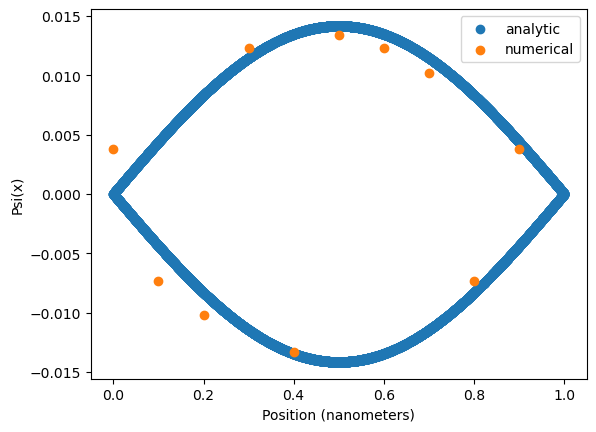

In [1469]:
N = 10
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    n_vec.append(vec)

ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    a_vec.append(vec)

plt.scatter(x, a_vec[0], label = "analytic" )
plt.scatter(i, n_vec[0], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()


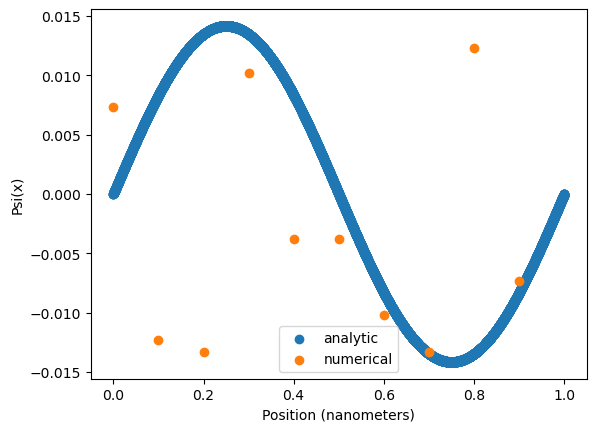

In [1470]:
plt.scatter(x, a_vec[1], label = "analytic" )
plt.scatter(i, n_vec[1], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

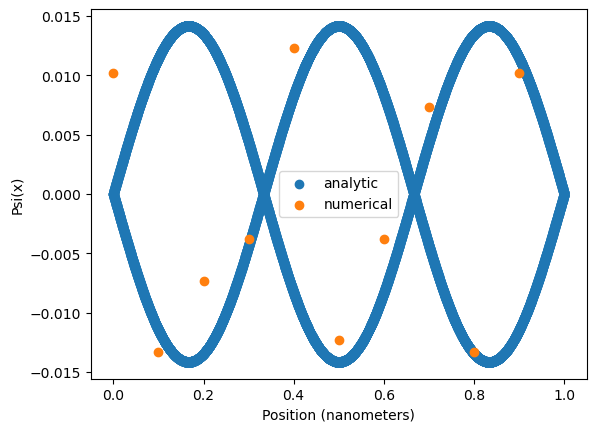

In [1471]:
plt.scatter(x, a_vec[2], label = "analytic" )
plt.scatter(i, n_vec[2], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

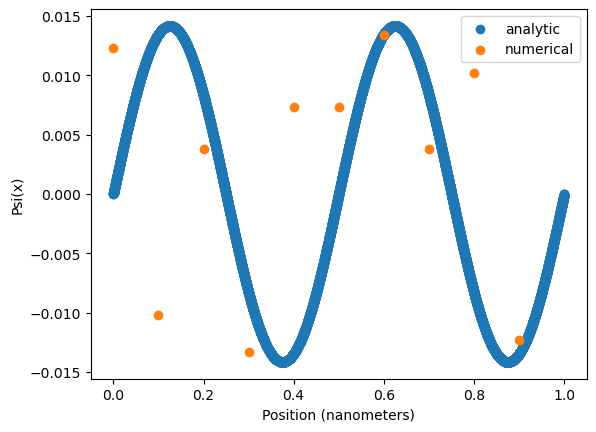

In [1472]:
plt.scatter(x, a_vec[3], label = "analytic" )
plt.scatter(i, n_vec[3], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

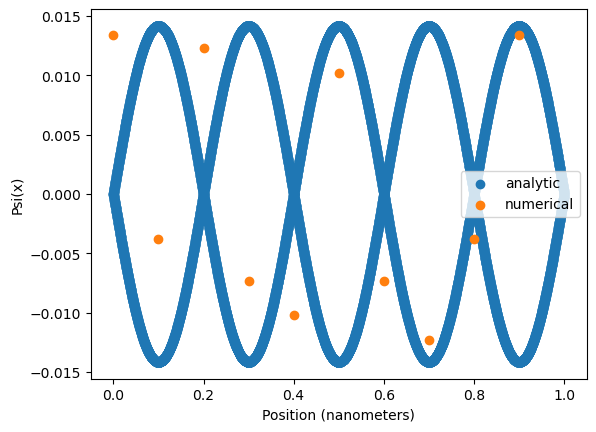

In [1473]:
plt.scatter(x, a_vec[4], label = "analytic" )
plt.scatter(i, n_vec[4], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

Let's try N = 100

Next, Let's plot the probability density functions. 

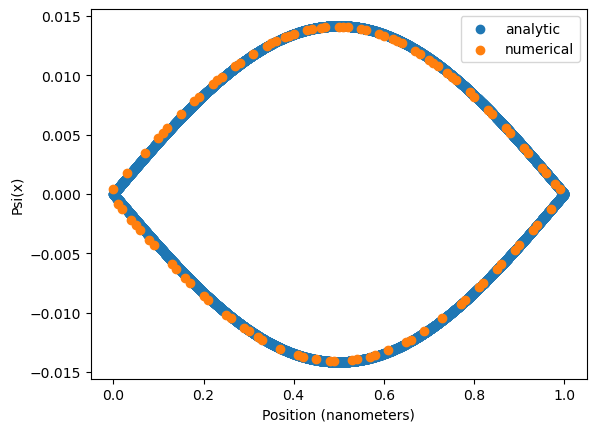

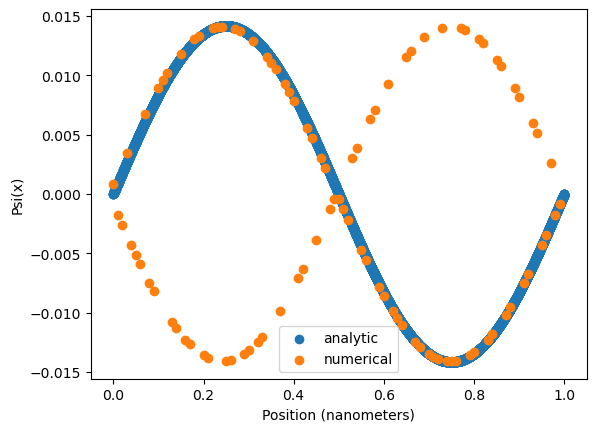

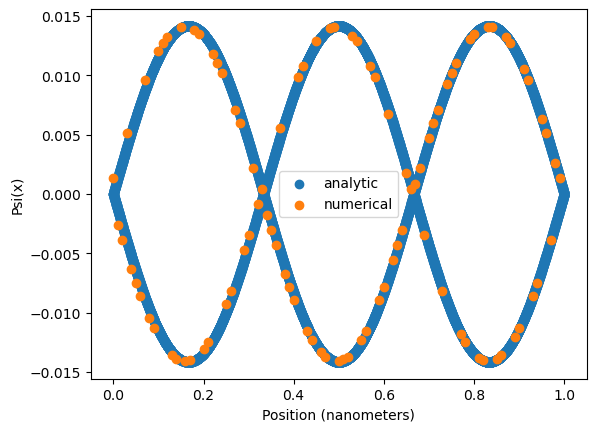

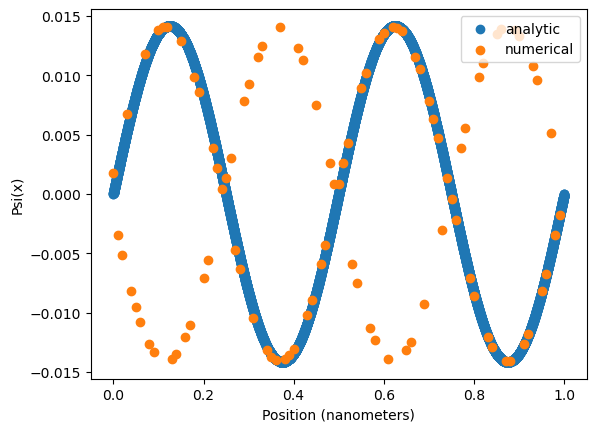

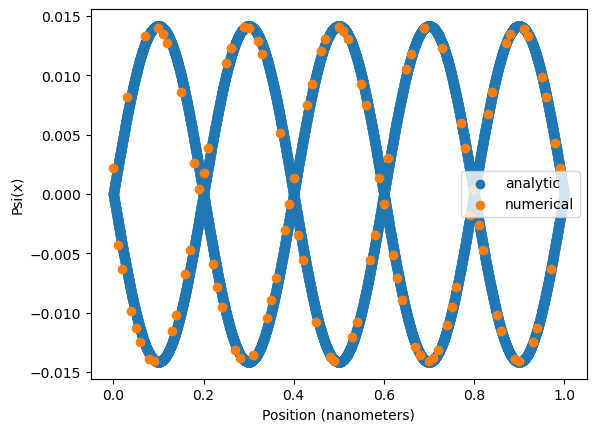

In [1474]:
N = 100
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    n_vec.append(vec)

ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    a_vec.append(vec)


plt.scatter(x, a_vec[0], label = "analytic" )
plt.scatter(i, n_vec[0], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[1], label = "analytic" )
plt.scatter(i, n_vec[1], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[2], label = "analytic" )
plt.scatter(i, n_vec[2], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[3], label = "analytic" )
plt.scatter(i, n_vec[3], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[4], label = "analytic" )
plt.scatter(i, n_vec[4], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

Now N = 1000

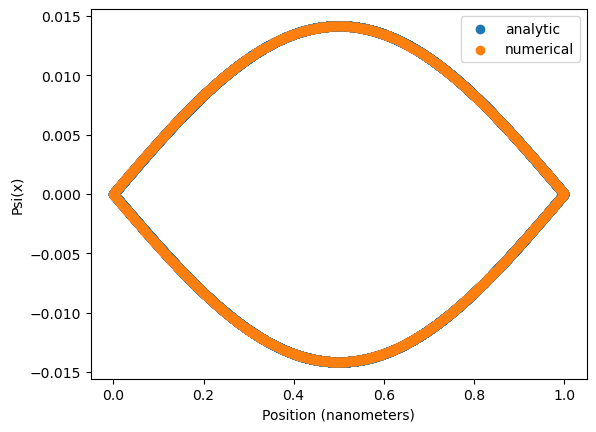

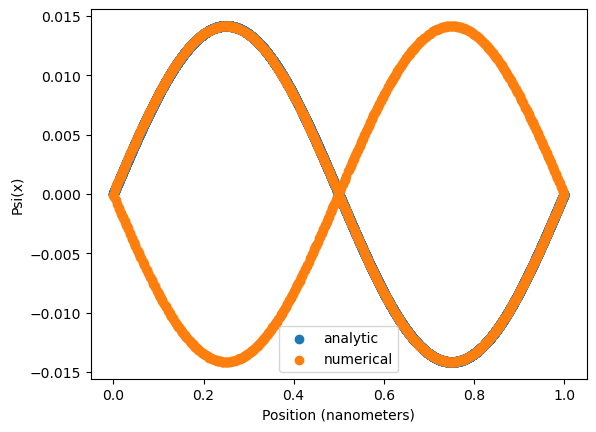

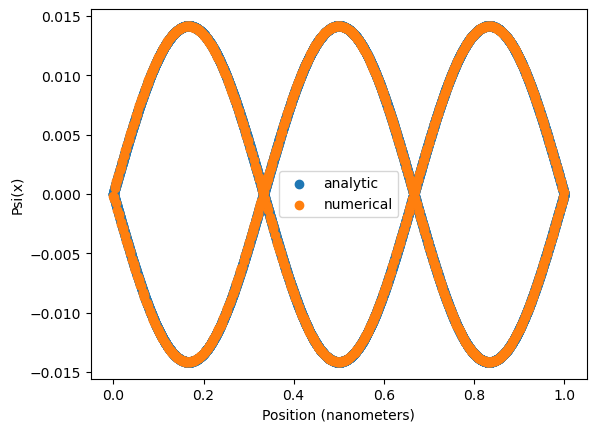

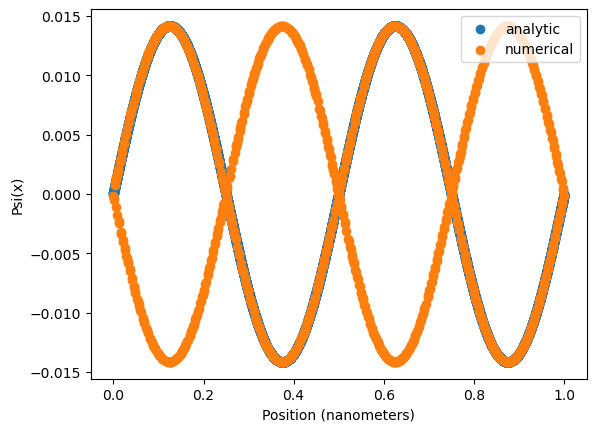

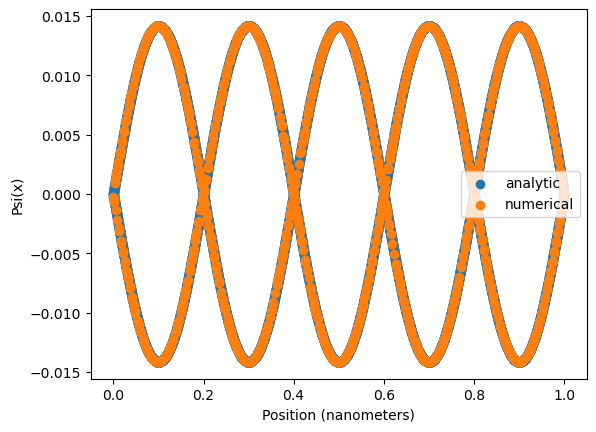

In [1475]:
N = 1000
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    n_vec.append(vec)

ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    a_vec.append(vec)


plt.scatter(x, a_vec[0], label = "analytic" )
plt.scatter(i, n_vec[0], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[1], label = "analytic" )
plt.scatter(i, n_vec[1], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[2], label = "analytic" )
plt.scatter(i, n_vec[2], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[3], label = "analytic" )
plt.scatter(i, n_vec[3], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec[4], label = "analytic" )
plt.scatter(i, n_vec[4], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

Now let's get the PDF's starting with N = 10

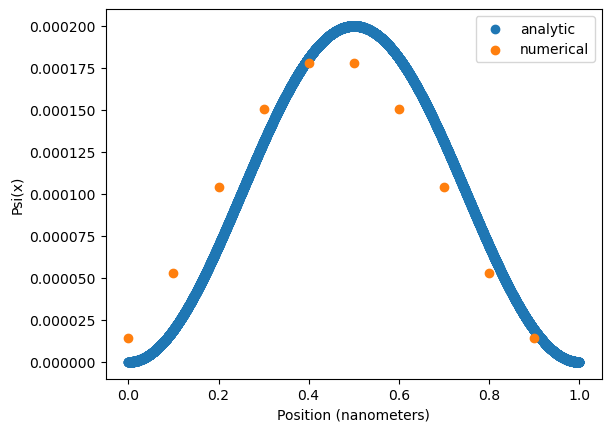

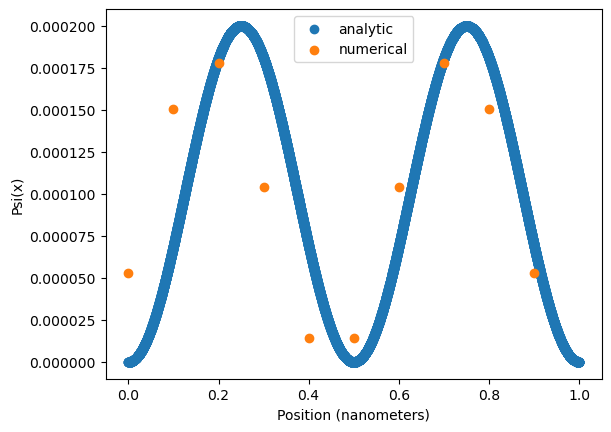

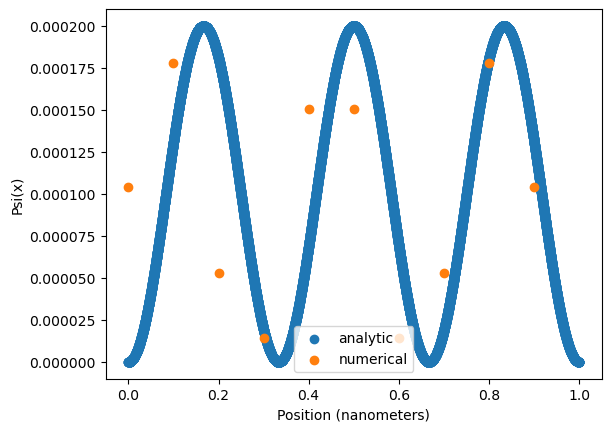

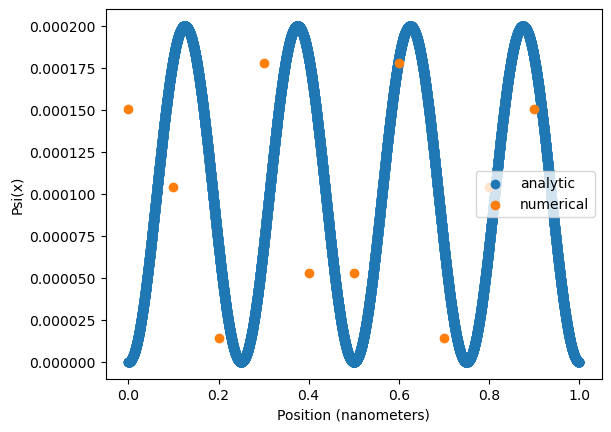

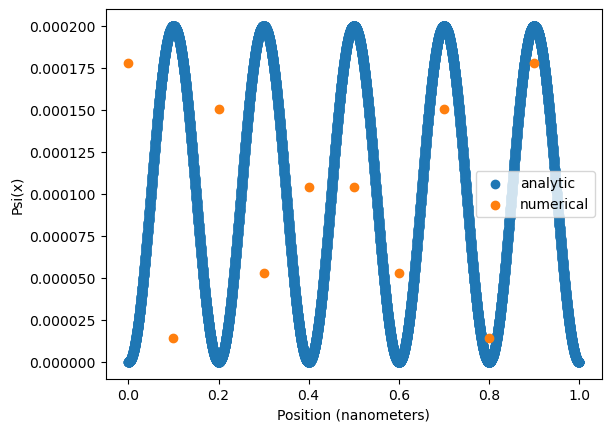

In [1476]:
N = 10
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
counter = 1
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    fixed_vec = []
    for num in vec:
        if counter%2 == 0:
            fixed_vec.append(-1*num)
        else:
            fixed_vec.append(num)
    n_vec.append(fixed_vec)
    counter+=1

ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    fixed_vec = []
    for num in vec:
        if num < 0:
            fixed_vec.append(1*num)
        else:
            fixed_vec.append(num)
    a_vec.append(fixed_vec)

a_vec_pdf = []
for vec in a_vec:
    a_vec_pdf.append(np.square(np.abs(vec)))
n_vec_pdf = []
for vec in n_vec:
    n_vec_pdf.append(np.square(np.abs(vec)))

plt.scatter(x, a_vec_pdf[0], label = "analytic" )
plt.scatter(i, n_vec_pdf[0], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[1], label = "analytic" )
plt.scatter(i, n_vec_pdf[1], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[2], label = "analytic" )
plt.scatter(i, n_vec_pdf[2], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[3], label = "analytic" )
plt.scatter(i, n_vec_pdf[3], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[4], label = "analytic" )
plt.scatter(i, n_vec_pdf[4], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

N = 100

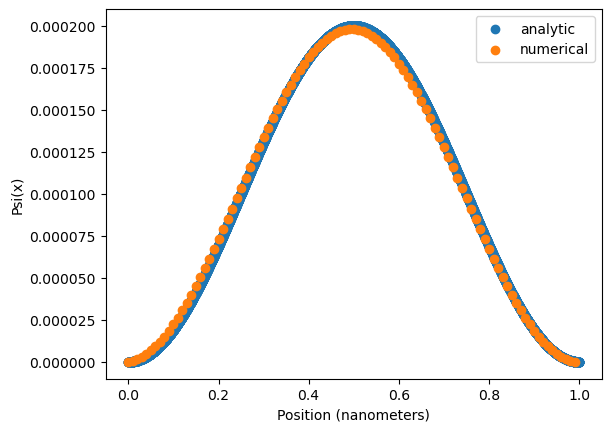

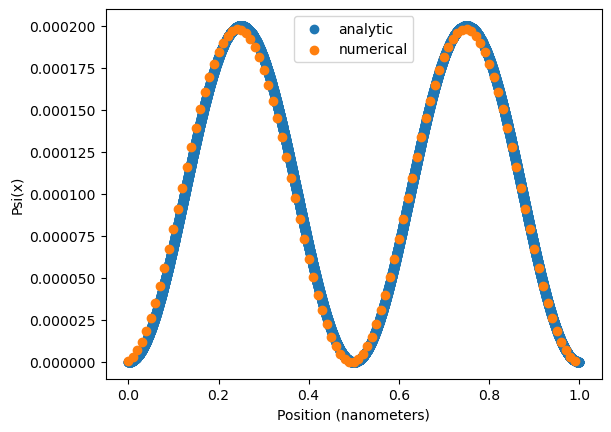

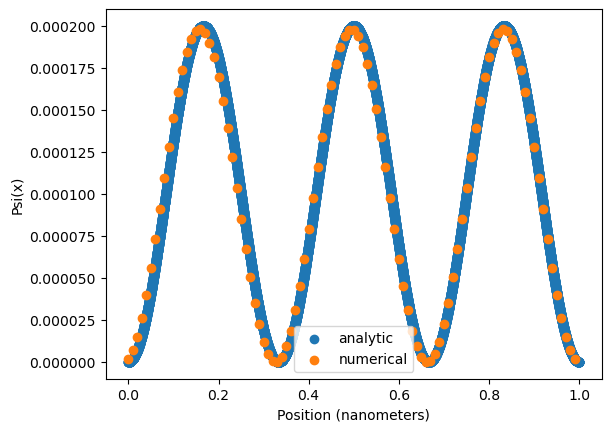

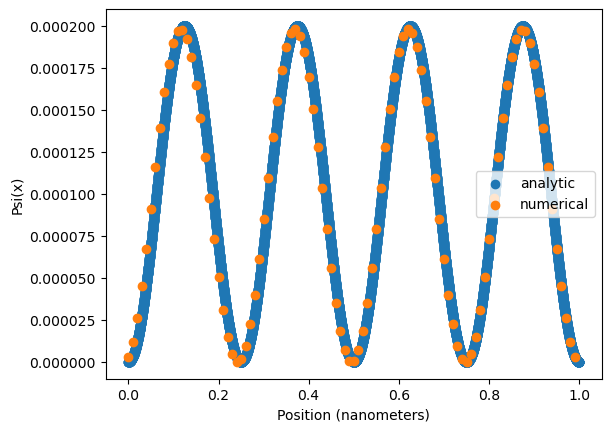

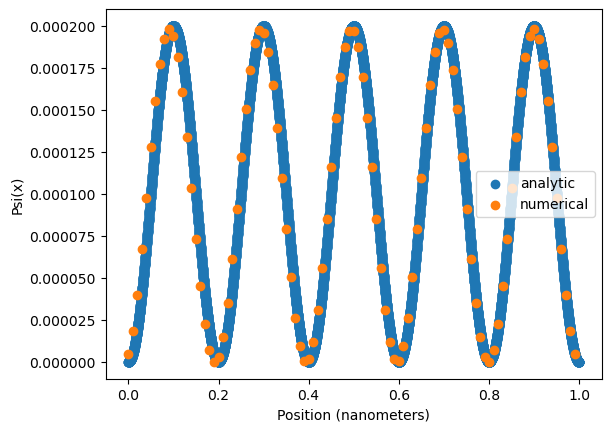

In [1477]:
N = 100
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
counter = 1
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    fixed_vec = []
    for num in vec:
        if counter%2 == 0:
            fixed_vec.append(-1*num)
        else:
            fixed_vec.append(num)
    n_vec.append(fixed_vec)
    counter+=1

ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    fixed_vec = []
    for num in vec:
        if num < 0:
            fixed_vec.append(1*num)
        else:
            fixed_vec.append(num)
    a_vec.append(fixed_vec)

a_vec_pdf = []
for vec in a_vec:
    a_vec_pdf.append(np.square(np.abs(vec)))
n_vec_pdf = []
for vec in n_vec:
    n_vec_pdf.append(np.square(np.abs(vec)))

plt.scatter(x, a_vec_pdf[0], label = "analytic" )
plt.scatter(i, n_vec_pdf[0], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[1], label = "analytic" )
plt.scatter(i, n_vec_pdf[1], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[2], label = "analytic" )
plt.scatter(i, n_vec_pdf[2], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[3], label = "analytic" )
plt.scatter(i, n_vec_pdf[3], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[4], label = "analytic" )
plt.scatter(i, n_vec_pdf[4], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

Now N = 1000

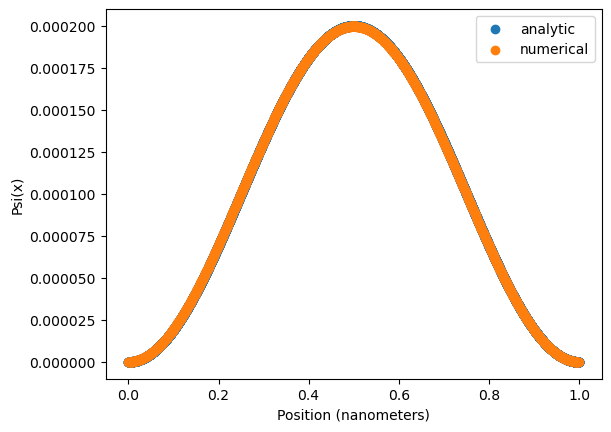

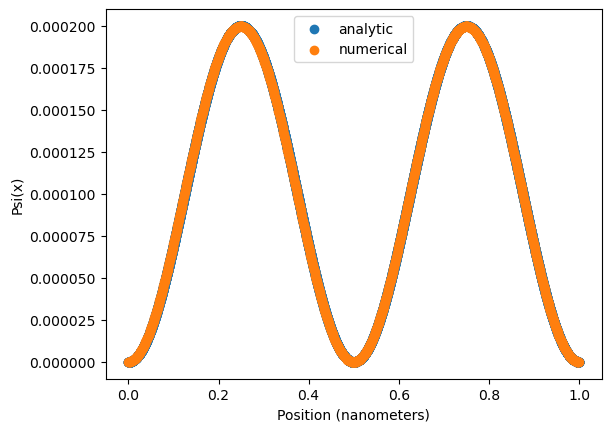

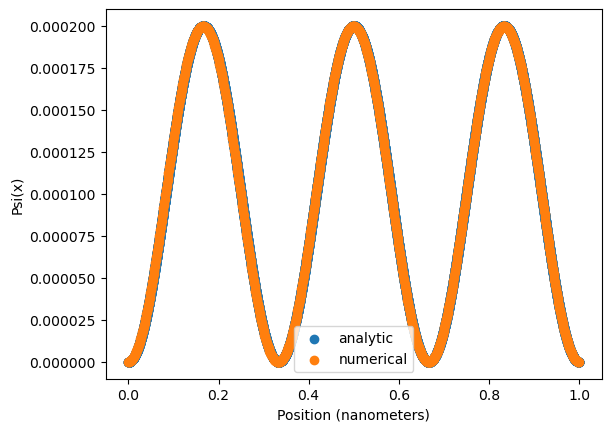

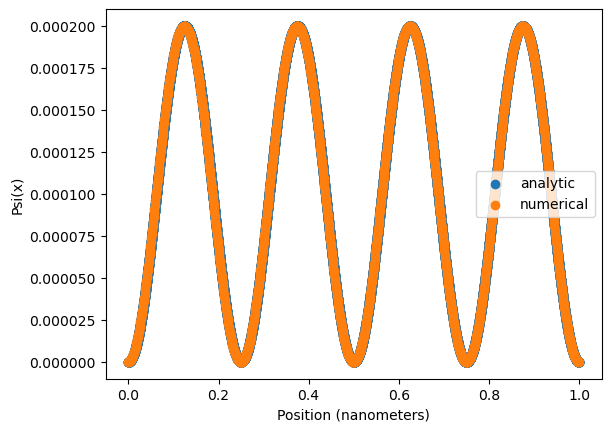

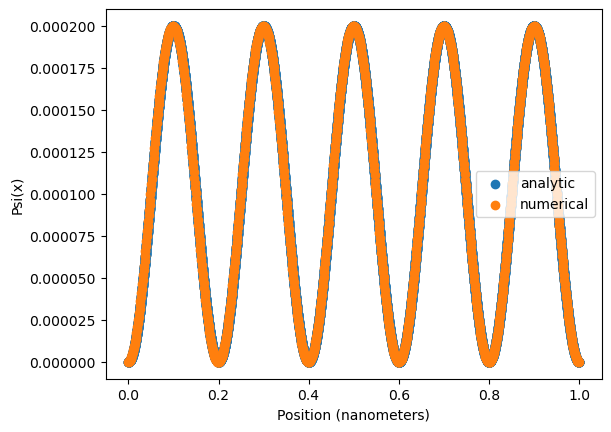

In [1478]:
N = 1000
m = 9.11*10**-31
L = 10*10**-9
d = L/N
i = np.arange(0, L, d)*1*10**8
x = np.linspace(0, L, 10000)*1*10**8
w, v = np.linalg.eigh(create_hamiltonian(N, m, L))
n_vals = w[:5]
vec = v[:5]
n_vec = []
counter = 1
for n in vec:
    vec = (n/np.linalg.norm(n*np.sqrt(len(x)/N)))
    fixed_vec = []
    for num in vec:
        if counter%2 == 0:
            fixed_vec.append(-1*num)
        else:
            fixed_vec.append(num)
    n_vec.append(fixed_vec)
    counter+=1

ns = np.linspace(1, 5, 5, dtype=int)
a_vec = []
for n in ns:
    vec = psi(m, L, x, n)/np.linalg.norm(psi(m, L, x, n))
    fixed_vec = []
    for num in vec:
        if num < 0:
            fixed_vec.append(1*num)
        else:
            fixed_vec.append(num)
    a_vec.append(fixed_vec)

a_vec_pdf = []
for vec in a_vec:
    a_vec_pdf.append(np.square(np.abs(vec)))
n_vec_pdf = []
for vec in n_vec:
    n_vec_pdf.append(np.square(np.abs(vec)))

plt.scatter(x, a_vec_pdf[0], label = "analytic" )
plt.scatter(i, n_vec_pdf[0], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[1], label = "analytic" )
plt.scatter(i, n_vec_pdf[1], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[2], label = "analytic" )
plt.scatter(i, n_vec_pdf[2], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[3], label = "analytic" )
plt.scatter(i, n_vec_pdf[3], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

plt.scatter(x, a_vec_pdf[4], label = "analytic" )
plt.scatter(i, n_vec_pdf[4], label = "numerical")
plt.xlabel("Position (nanometers)")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

Here the analyitical graph is difficult to see because the two plots are so similar.